<a href="https://www.kaggle.com/code/hanbikim/feature-scaling?scriptVersionId=99840829" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Library Load

In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Random Data Generation

In [3]:
np.random.seed(0) #set seed to generate the same random numbers
x = np.random.randint(-10,high=10,size=(50,))

np.random.seed(2) #set different seed to y
y = np.random.randint(-10,high=10,size=(50,))

In [4]:
# 50 random numbers generated in seed 0
print(x)

[  2   5 -10  -7  -7  -3  -1   9   8  -6  -4   2  -9  -4  -3   4   7  -5
   3  -2  -1   9   6   9  -5   5   5 -10   8  -7   7   9   9   9   4  -3
 -10  -9  -1 -10   0  -7   1   8  -8 -10 -10  -6  -5  -4]


In [5]:
# 50 random numbers generated in seed 1
print(y)

[-2  5  3 -2  1  8  1 -2 -3 -8  7  1  5 -5 -3 -7 -4 -6  0  1  9 -3 -4  0
 -9 -7 -5 -6  4 -4  9 -8  6  4  2  8 -6  5  7 -3  4 -2  8  3  5 -1  3 -2
  7 -1]


## Generated Random Data Visualization

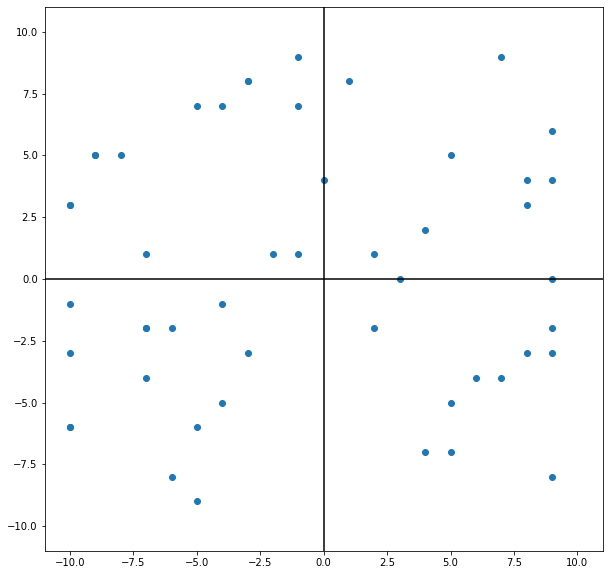

In [6]:
# Scatter Plot
plt.figure(figsize=(10,10)) # set figure size
plt.scatter(x, y) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation
plt.show()

In [7]:
print(f"mean of x = {np.mean(x)}")
print(f"variance of x = {np.var(x)}")
print(f"max of x = {np.max(x)}")
print(f"min of x = {np.min(x)}")

mean of x = -0.76
variance of x = 43.18240000000001
max of x = 9
min of x = -10


In [8]:
print(f"mean of y = {np.mean(y)}")
print(f"variance of y = {np.var(y)}")
print(f"max of y = {np.max(y)}")
print(f"min of y = {np.min(y)}")

mean of y = 0.26
variance of y = 25.752399999999998
max of y = 9
min of y = -9


# Feature Scaling

## MinMax Scaling

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Norm_eq.gif) <br>
ref: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [9]:
x_prime = (x - np.min(x))/(np.max(x) - np.min(x))
print(x_prime)

[0.63157895 0.78947368 0.         0.15789474 0.15789474 0.36842105
 0.47368421 1.         0.94736842 0.21052632 0.31578947 0.63157895
 0.05263158 0.31578947 0.36842105 0.73684211 0.89473684 0.26315789
 0.68421053 0.42105263 0.47368421 1.         0.84210526 1.
 0.26315789 0.78947368 0.78947368 0.         0.94736842 0.15789474
 0.89473684 1.         1.         1.         0.73684211 0.36842105
 0.         0.05263158 0.47368421 0.         0.52631579 0.15789474
 0.57894737 0.94736842 0.10526316 0.         0.         0.21052632
 0.26315789 0.31578947]


### MinMaxScaler from Sklearn

sklearn provides MinMaxScaler function to get the same result as above. First, we need to load MinMaxScaler() and fit it to data set, which means calcalate max and min value of data and save it for further use. After fitting, we can trasform our data set to scaled data set in terms of max and min value fitted before. 

In [10]:
from sklearn.preprocessing import MinMaxScaler
x_scale = MinMaxScaler().fit(x.reshape(-1, 1))
x_minmax = x_scale.transform(x.reshape(-1, 1))
y_scale = MinMaxScaler().fit(y.reshape(-1, 1))
y_minmax = y_scale.transform(y.reshape(-1, 1))
print(x_minmax)

[[0.63157895]
 [0.78947368]
 [0.        ]
 [0.15789474]
 [0.15789474]
 [0.36842105]
 [0.47368421]
 [1.        ]
 [0.94736842]
 [0.21052632]
 [0.31578947]
 [0.63157895]
 [0.05263158]
 [0.31578947]
 [0.36842105]
 [0.73684211]
 [0.89473684]
 [0.26315789]
 [0.68421053]
 [0.42105263]
 [0.47368421]
 [1.        ]
 [0.84210526]
 [1.        ]
 [0.26315789]
 [0.78947368]
 [0.78947368]
 [0.        ]
 [0.94736842]
 [0.15789474]
 [0.89473684]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.73684211]
 [0.36842105]
 [0.        ]
 [0.05263158]
 [0.47368421]
 [0.        ]
 [0.52631579]
 [0.15789474]
 [0.57894737]
 [0.94736842]
 [0.10526316]
 [0.        ]
 [0.        ]
 [0.21052632]
 [0.26315789]
 [0.31578947]]


We can see from the figure below, we changed the distribution of data x and y by their max and min value respectively. Therefore, ervey data point is now in the range between 0 and 1. 

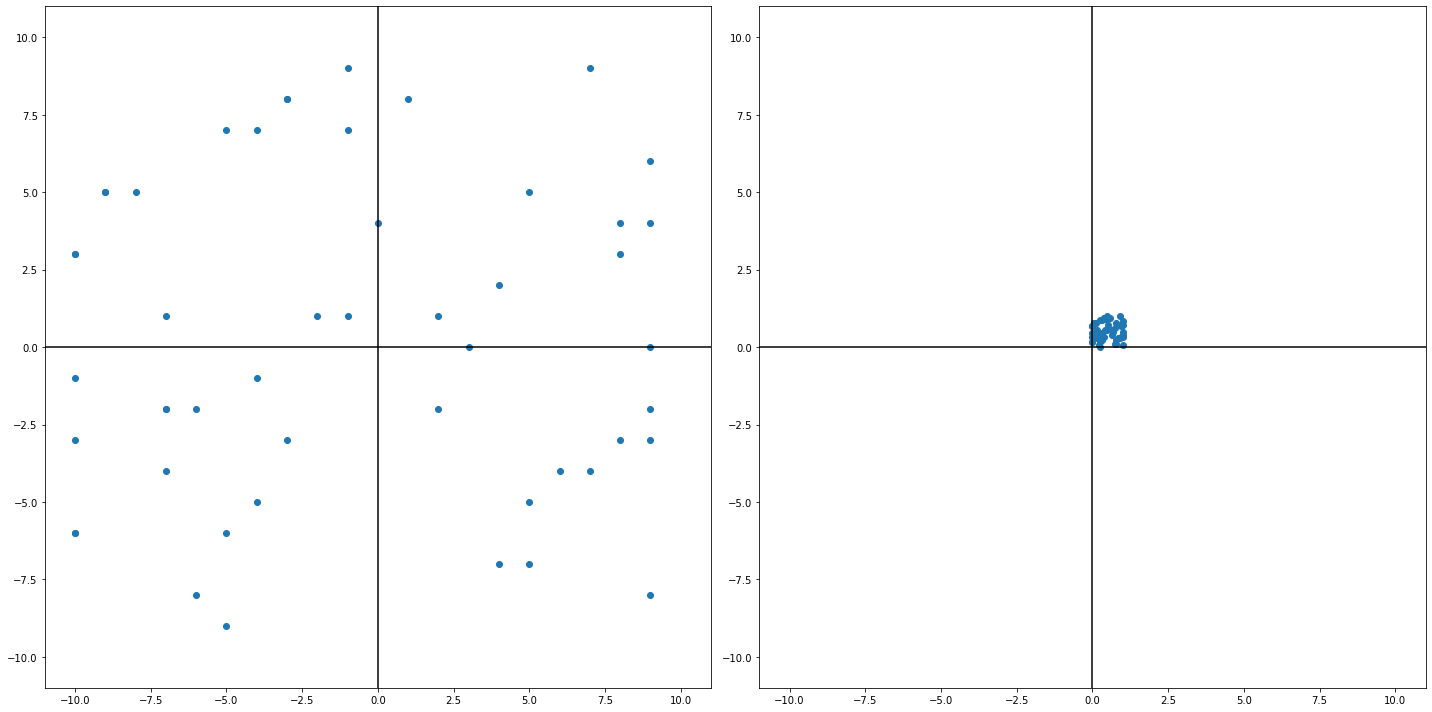

In [11]:
# Scatter Plot
plt.figure(figsize=(20,10)) # set figure size

plt.subplot(1, 2, 1)  
plt.scatter(x, y) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation

plt.subplot(1, 2, 2)  
plt.scatter(x_minmax, y_minmax) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation

plt.tight_layout()
plt.show()

# Standardization

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif)

In [12]:
x_prime = (x - np.mean(x))/np.std(x)
print(x_prime)

[ 0.42000619  0.87653466 -1.40610769 -0.94957922 -0.94957922 -0.34087459
 -0.03652228  1.48523929  1.33306313 -0.79740306 -0.49305075  0.42000619
 -1.25393153 -0.49305075 -0.34087459  0.72435851  1.18088698 -0.64522691
  0.57218235 -0.18869843 -0.03652228  1.48523929  1.02871082  1.48523929
 -0.64522691  0.87653466  0.87653466 -1.40610769  1.33306313 -0.94957922
  1.18088698  1.48523929  1.48523929  1.48523929  0.72435851 -0.34087459
 -1.40610769 -1.25393153 -0.03652228 -1.40610769  0.11565388 -0.94957922
  0.26783004  1.33306313 -1.10175538 -1.40610769 -1.40610769 -0.79740306
 -0.64522691 -0.49305075]


In [13]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler
x_standard = StandardScaler().fit(x.reshape(-1, 1))
y_standard = StandardScaler().fit(y.reshape(-1, 1))
x_std = x_standard.transform(x.reshape(-1, 1))
y_std = y_standard.transform(y.reshape(-1, 1))
print(x_std)

[[ 0.42000619]
 [ 0.87653466]
 [-1.40610769]
 [-0.94957922]
 [-0.94957922]
 [-0.34087459]
 [-0.03652228]
 [ 1.48523929]
 [ 1.33306313]
 [-0.79740306]
 [-0.49305075]
 [ 0.42000619]
 [-1.25393153]
 [-0.49305075]
 [-0.34087459]
 [ 0.72435851]
 [ 1.18088698]
 [-0.64522691]
 [ 0.57218235]
 [-0.18869843]
 [-0.03652228]
 [ 1.48523929]
 [ 1.02871082]
 [ 1.48523929]
 [-0.64522691]
 [ 0.87653466]
 [ 0.87653466]
 [-1.40610769]
 [ 1.33306313]
 [-0.94957922]
 [ 1.18088698]
 [ 1.48523929]
 [ 1.48523929]
 [ 1.48523929]
 [ 0.72435851]
 [-0.34087459]
 [-1.40610769]
 [-1.25393153]
 [-0.03652228]
 [-1.40610769]
 [ 0.11565388]
 [-0.94957922]
 [ 0.26783004]
 [ 1.33306313]
 [-1.10175538]
 [-1.40610769]
 [-1.40610769]
 [-0.79740306]
 [-0.64522691]
 [-0.49305075]]


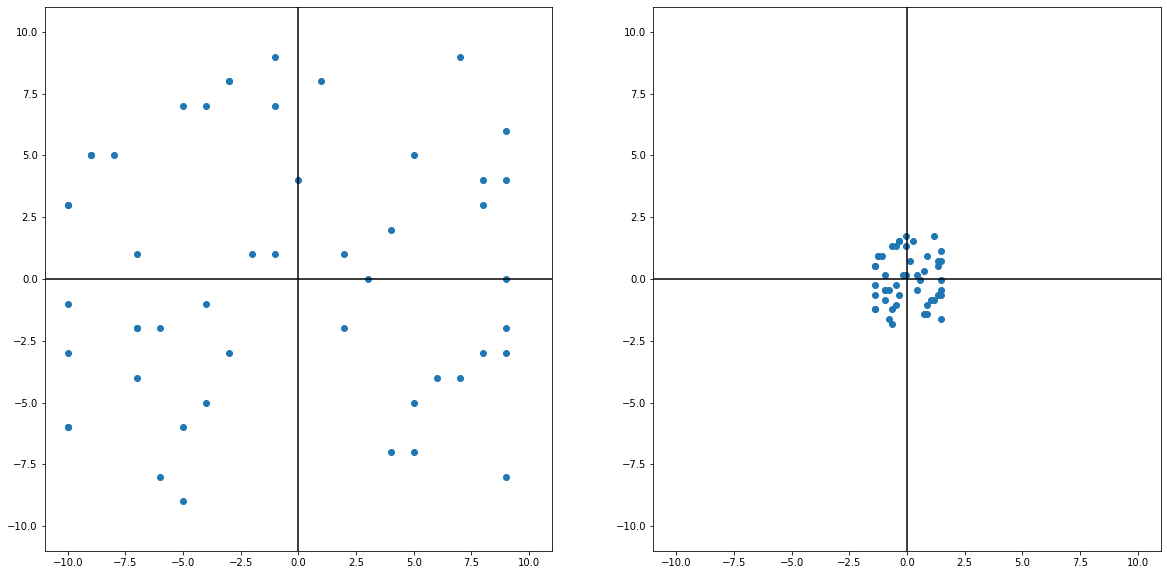

In [14]:
# Scatter Plot
plt.figure(figsize=(20,10)) # set figure size

plt.subplot(1, 2, 1)  
plt.scatter(x, y) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation

plt.subplot(1, 2, 2)  
plt.scatter(x_std, y_std) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation
plt.show()

## Normalization

![](https://editor.analyticsvidhya.com/uploads/23887plot4.PNG)

In [15]:
x_new = (x - np.mean(x))/(np.max(x) - np.min(x))
y_new = (y - np.mean(y))/(np.max(y) - np.min(y))
print(x_new)

[ 0.14526316  0.30315789 -0.48631579 -0.32842105 -0.32842105 -0.11789474
 -0.01263158  0.51368421  0.46105263 -0.27578947 -0.17052632  0.14526316
 -0.43368421 -0.17052632 -0.11789474  0.25052632  0.40842105 -0.22315789
  0.19789474 -0.06526316 -0.01263158  0.51368421  0.35578947  0.51368421
 -0.22315789  0.30315789  0.30315789 -0.48631579  0.46105263 -0.32842105
  0.40842105  0.51368421  0.51368421  0.51368421  0.25052632 -0.11789474
 -0.48631579 -0.43368421 -0.01263158 -0.48631579  0.04       -0.32842105
  0.09263158  0.46105263 -0.38105263 -0.48631579 -0.48631579 -0.27578947
 -0.22315789 -0.17052632]


In [16]:
from sklearn.preprocessing import Normalizer
x_normalized = Normalizer().fit(x.reshape(-1, 1))
x_nor = x_normalized.transform(x.reshape(-1, 1))
y_normalized = Normalizer().fit(y.reshape(-1, 1))
y_nor = y_normalized.transform(y.reshape(-1, 1))
print(x_nor)

[[ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 0.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


It seems like Sklearn Normalizer() automatically rounds up the result

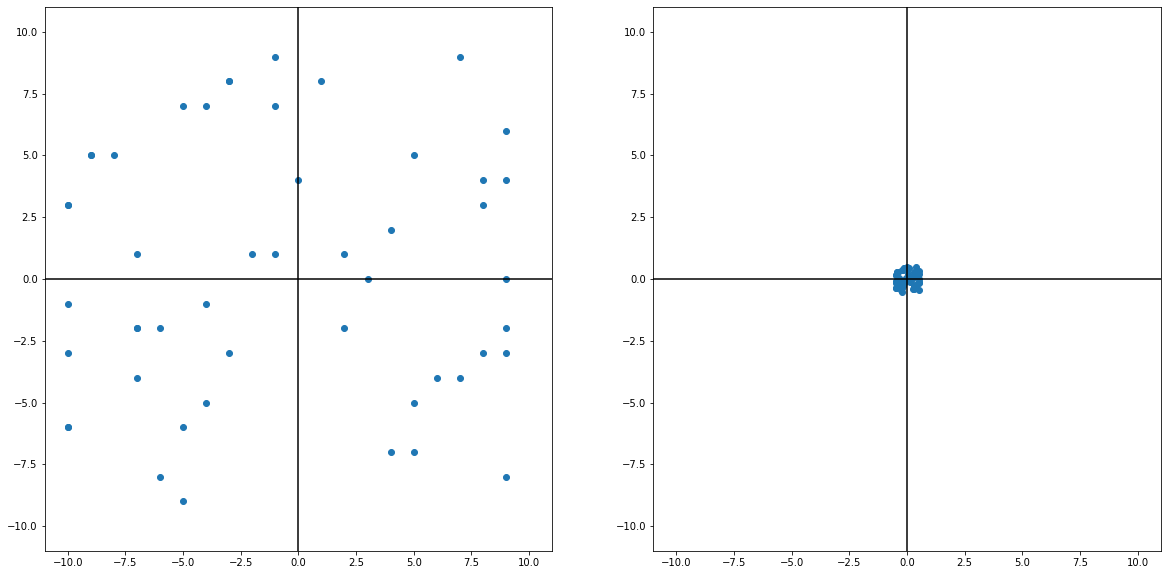

In [17]:
# Scatter Plot
plt.figure(figsize=(20,10)) # set figure size

plt.subplot(1, 2, 1)  
plt.scatter(x, y) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation

plt.subplot(1, 2, 2)  
plt.scatter(x_new, y_new) # Draw Scatter plot with x and y data
plt.plot([0,0],[-12,12], color='black') # draw a vertical line
plt.plot([-12,12],[0,0], color='black') # draw a horizontal line
plt.xlim(-11, 11) # x-axis range limitation
plt.ylim(-11, 11) # y-axis range limitation
plt.show()